In [1]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import os
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
import sys
import importlib
import pingouin as pg
import pandas as pd
import analysis_utilities as au
from itertools import combinations
from IPython.display import display
from statsmodels.multivariate.manova import MANOVA

'''
Using function now instead of writing things over and over again 
'''

'\nUsing function now instead of writing things over and over again \n'

In [2]:
sys.path.insert(0,r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement')
import plot_functions as pf
import read_data_functions as rdf
import Statistics
from initializer import InitialThangs
from Subject_Object_v3 import perc
%load_ext autoreload
%autoreload 2
'''
'''

'\n'

## Initial Thangs

In [3]:
EXPERIMENT = "Exp2"
it = InitialThangs(EXPERIMENT)

In [4]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()
os.getcwd()

'D:\\OneDrive - University of Delaware - o365\\Subject_Data\\MatchPennies_Agent_Exp2'

## Pickle Objects

In [5]:
if "group" not in locals():
    group = rdf.generate_subject_object_v3(EXPERIMENT, "All Trials")
else:
    if group.exp_info.experiment != EXPERIMENT:  # This means i changed experiment and need to run again
        group = rdf.generate_subject_object_v3(EXPERIMENT, "All Trials")

## Set Save to True or False

In [6]:
save = False

## Set Save to True or False

In [7]:
save = False

In [11]:
react_mixed_median  = np.nanmedian(group.movement_metrics.exp2_react_guess_reaction_time_split('react','mixed'),axis=1)
react_only_median   = np.nanmedian(group.movement_metrics.exp2_react_guess_reaction_time_split('react','only'),axis=1)
guess_mixed_median = np.nanmedian(group.movement_metrics.exp2_react_guess_reaction_time_split('guess','mixed'),axis=1)
guess_only_median  = np.nanmedian(group.movement_metrics.exp2_react_guess_reaction_time_split('guess','only'),axis=1)

react_mixed_std  = np.nanstd(group.movement_metrics.exp2_react_guess_reaction_time_split('react','mixed'),axis=1)
react_only_std   = np.nanstd(group.movement_metrics.exp2_react_guess_reaction_time_split('react','only'),axis=1)
guess_mixed_std = np.nanstd(group.movement_metrics.exp2_react_guess_reaction_time_split('guess','mixed'),axis=1)
guess_only_std  = np.nanstd(group.movement_metrics.exp2_react_guess_reaction_time_split('guess','only'),axis=1)

reaction_time_median = np.vstack((react_mixed_median,guess_mixed_median,react_only_median,guess_only_median)).T
reaction_time_std    = np.vstack((react_mixed_std,guess_mixed_std,react_only_std,guess_only_std)).T

## Initialize bootstrap

In [15]:
so = Statistics.Inputs(df=None, experiment = EXPERIMENT, num_subjects = it.num_subjects, num_blocks=it.num_blocks,num_trials=it.num_trials,
                           trial_block_titles=it.trial_block_titles, xlab=it.xlabel, f1_xticklabels=it.f1_collapse_xticklabs,
                           f2_xticklabels=it.f2_collapse_xticklabs,f1_xlabel=it.f1_xlabel,f2_xlabel=it.f2_xlabel,
                           M = 1e6)

In [ ]:
_,b = so.pairwise_bootstrap(reaction_time_median,condition_nums = condition_nums,M=1e1,test='mean')

In [ ]:
pvals,cles = so.pairwise_bootstrap(reaction_time_median,condition_nums = condition_nums,M=1e4,test='mean')

Text(0.5, 1.0, 'Median Reaction Time')

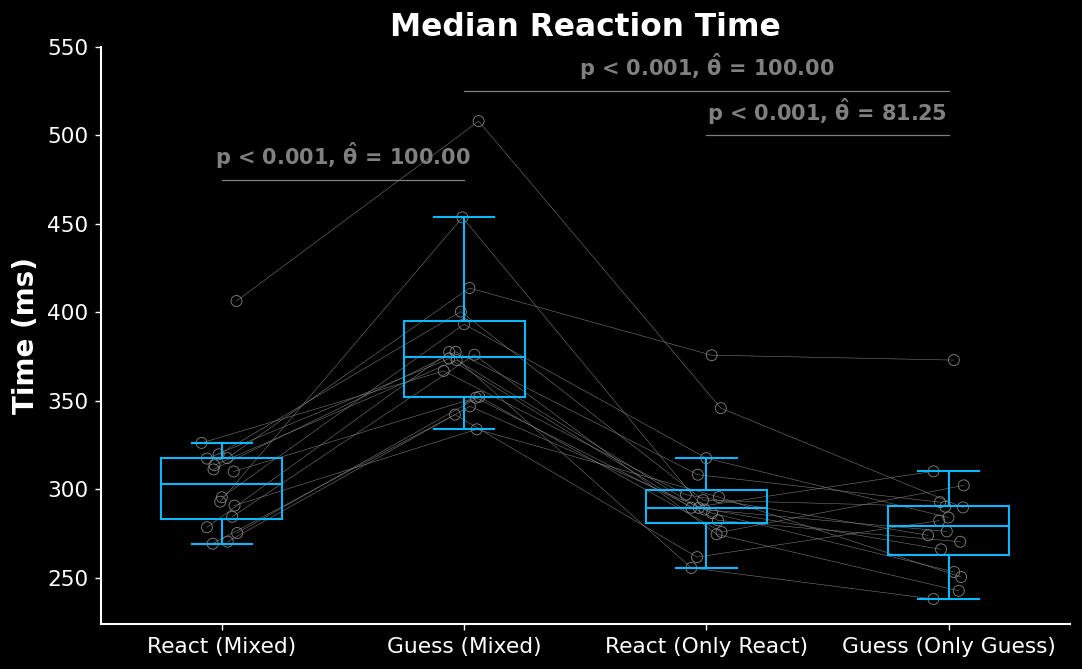

In [ ]:
fig,ax = plt.subplots(figsize = (10,6))
dv.boxplot(reaction_time_median[:,0],x_pos = 0,ax=ax)
dv.boxplot(reaction_time_median[:,1],x_pos = 1,ax=ax)
dv.boxplot(reaction_time_median[:,2],x_pos = 2,ax=ax)
dv.boxplot(reaction_time_median[:,3],x_pos = 3,ax=ax)
dv.jitter_array(ax =ax, x_positions = [0,1,2,3],data_list = [react_mixed_median,guess_mixed_median,react_only_median,guess_only_median],circle_size = 40,include_mean=False)

statline_y = 475
shift = 25
xlocs = np.arange(0,5,1)
combos = so.create_combos(condition_nums)
combos = ['01','23','13']
for c in combos:
    a = int(c[0])
    b = int(c[1])
    if pvals[c]<0.05:
        dv.stat_annotation(ax,xlocs[a],xlocs[b],statline_y,p_val=pvals[c],cles=cles[c],
                        fontsize=12,h=5)
        statline_y += shift
xlabs = ['React (Mixed)','Guess (Mixed)','React (Only React)','Guess (Only Guess)']
ax.set_xticks([0,1,2,3])
ax.set_yticks(np.arange(250,600,50))
ax.set_xticklabels(xlabs)
ax.set_ylabel('Median Reaction Time (ms)')
# ax.set_title('Median Reaction Time (ms)')

In [ ]:
pvals,cles = so.pairwise_bootstrap(reaction_time_std,condition_nums = condition_nums,M=1e4,test='mean')

Text(0.5, 1.0, 'Reaction Time SD (ms)')

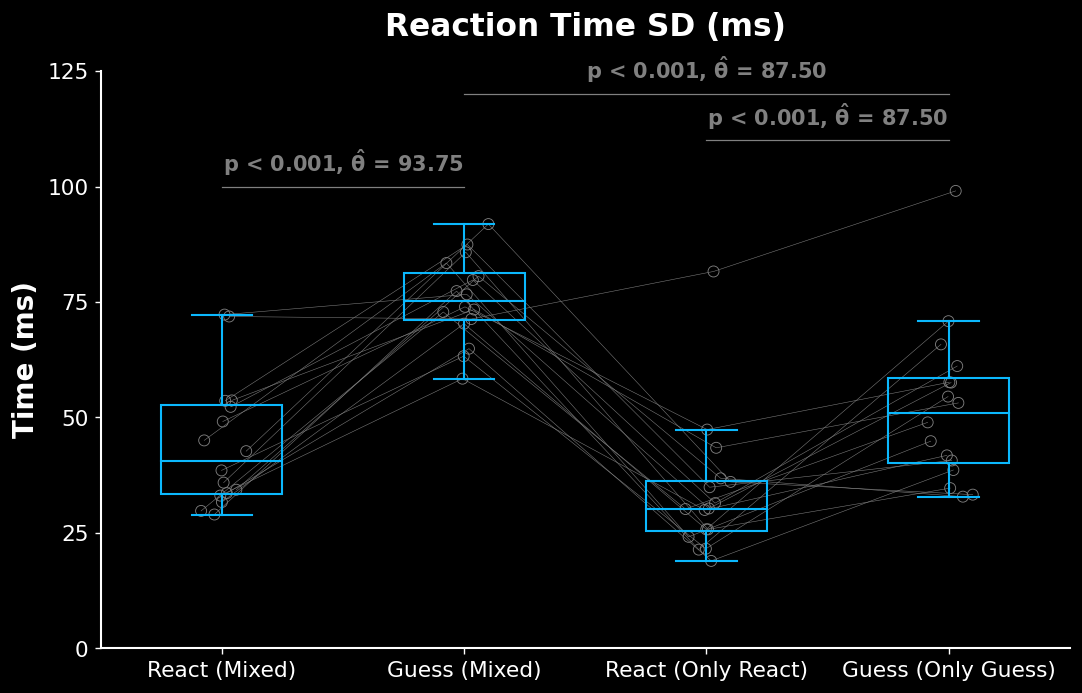

In [ ]:
fig,ax = plt.subplots(figsize = (10,6))
dv.boxplot(reaction_time_std[:,0],x_pos = 0,ax=ax)
dv.boxplot(reaction_time_std[:,1],x_pos = 1,ax=ax)
dv.boxplot(reaction_time_std[:,2],x_pos = 2,ax=ax)
dv.boxplot(reaction_time_std[:,3],x_pos = 3,ax=ax)
dv.jitter_array(ax =ax, x_positions = [0,1,2,3],data_list = [react_mixed_std,guess_mixed_std,react_only_std,guess_only_std],circle_size = 40,include_mean=False)

statline_y = 100
shift = 10
xlocs = np.arange(0,5,1)
combos = so.create_combos(condition_nums)
combos = ['01','23','13']
for c in combos:
    a = int(c[0])
    b = int(c[1])
    if pvals[c]<0.05:
        dv.stat_annotation(ax,xlocs[a],xlocs[b],statline_y,p_val=pvals[c],cles=cles[c],
                        fontsize=12,h=2)
        statline_y += shift
xlabs = ['React (Mixed)','Guess (Mixed)','React (Only React)','Guess (Only Guess)']
ax.set_xticks([0,1,2,3])
ax.set_yticks(np.arange(0,150,25))
ax.set_xticklabels(xlabs)
ax.set_ylabel('SD Reaction Time SD (ms)')
# ax.set_title('SD Reaction Time SD (ms)',pad=20)